In [1]:
import random
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import f
from statsmodels.stats.weightstats import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pandas as pd

In [2]:
def get_ranks(X):
    array = np.array(X)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks

In [3]:
X1 = stats.norm.rvs(5, 2, size = 100, random_state = 100)
X2 = stats.norm.rvs(5, 2, size = 100, random_state = 110)

In [4]:
X1.mean()

4.791668292311871

In [5]:
X2.mean()

4.910587825620245

In [6]:
X1.var()

3.7616796165366333

In [7]:
X2.var()

3.982893869626823

In [8]:
stats.pearsonr(X1, X2)

(0.008884991039840452, 0.9300876452342466)

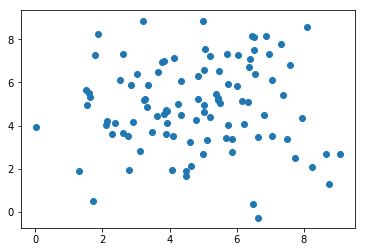

In [11]:
plt.scatter(X1, X2)
plt.savefig('lab4_1.png')

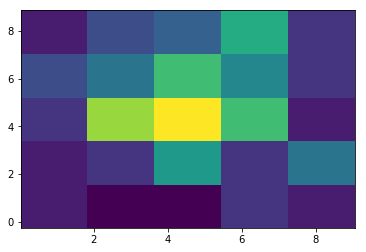

In [12]:
h = plt.hist2d(X1, X2, bins = 5)

In [13]:
h

(array([[ 1.,  1.,  2.,  3.,  1.],
        [ 0.,  2., 11.,  5.,  3.],
        [ 0.,  7., 13.,  9.,  4.],
        [ 2.,  2.,  9.,  6.,  8.],
        [ 1.,  5.,  1.,  2.,  2.]]),
 array([0.02569693, 1.83440057, 3.64310421, 5.45180785, 7.26051148,
        9.06921512]),
 array([-0.26219223,  1.56445766,  3.39110755,  5.21775743,  7.04440732,
         8.8710572 ]),
 <matplotlib.collections.QuadMesh at 0x7f0af8060290>)

In [14]:
stats.chi2_contingency(h[0])

(20.96353867023802,
 0.17991637574923725,
 16,
 array([[ 0.32,  1.36,  2.88,  2.  ,  1.44],
        [ 0.84,  3.57,  7.56,  5.25,  3.78],
        [ 1.32,  5.61, 11.88,  8.25,  5.94],
        [ 1.08,  4.59,  9.72,  6.75,  4.86],
        [ 0.44,  1.87,  3.96,  2.75,  1.98]]))

In [15]:
lamb_s = np.linspace(0., 1., 100)
u = []
v = []
for lamb in lamb_s:
    u.append(lamb*X1 + (1-lamb)*X2)
    v.append(lamb*X1**3 + (1-lamb)*X2**3)

In [16]:
pears_corr = []
spear_corr = []
kend_corr = []
for x_i in u:
    pears_corr.append(stats.pearsonr(X1, x_i)[0])
    spear_corr.append(stats.spearmanr(X1, x_i)[0])
    kend_corr.append(stats.kendalltau(X1, x_i)[0])

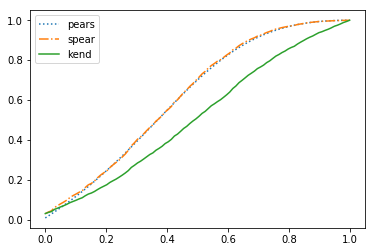

In [18]:
plt.plot(lamb_s, pears_corr, label = 'pears', linestyle=':')
plt.plot(lamb_s, spear_corr, label = 'spear', linestyle='-.')
plt.plot(lamb_s, kend_corr, label = 'kend')
plt.legend()
plt.savefig('lab4_2.png')

In [19]:
pears_corr = []
spear_corr = []
kend_corr = []
for x_i in v:
    pears_corr.append(stats.pearsonr(X1, x_i)[0])
    spear_corr.append(stats.spearmanr(X1, x_i)[0])
    kend_corr.append(stats.kendalltau(X1, x_i)[0])

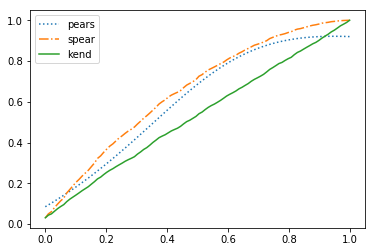

In [20]:
plt.plot(lamb_s, pears_corr, label = 'pears', linestyle=':')
plt.plot(lamb_s, spear_corr, label = 'spear', linestyle='-.')
plt.plot(lamb_s, kend_corr, label = 'kend')
plt.legend()
plt.savefig('lab4_3.png')

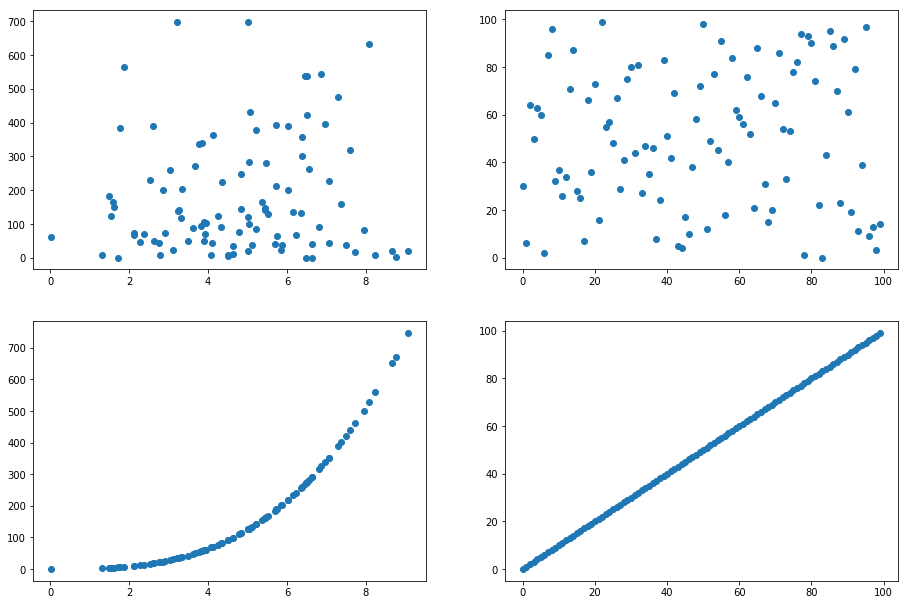

In [25]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15.5, 10.5)
ax[0][0].scatter(X1, X2**3)
ax[1][0].scatter(X1, X1**3)
ax[0][1].scatter(get_ranks(X1), get_ranks(X2**3))
ax[1][1].scatter(get_ranks(X1), get_ranks(X1**3))
plt.savefig('lab4_4.png')